<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Unsupervised_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering on Iris Dataset**

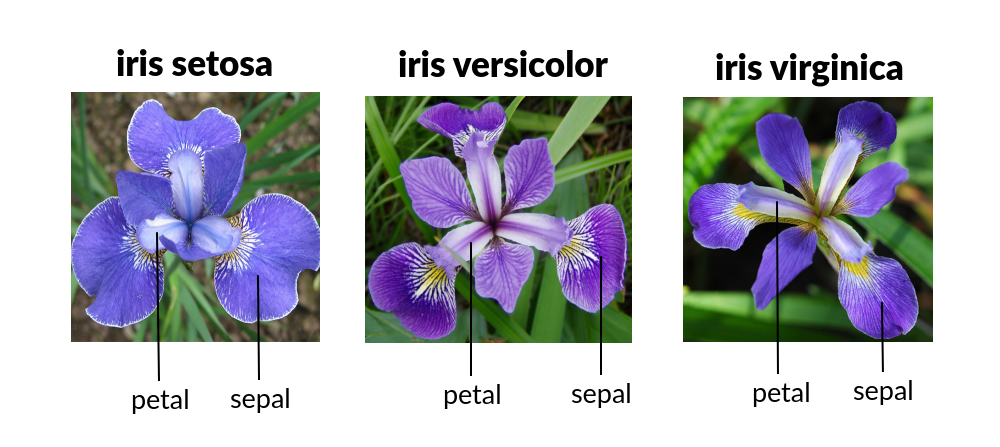

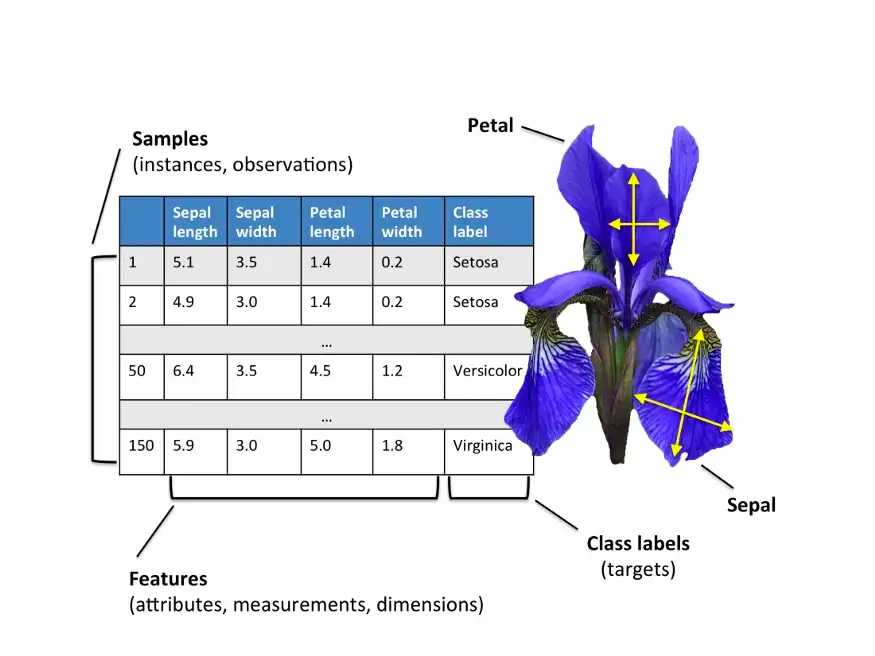

## **Problem Statement**
The goal of this notebook is to explore and apply clustering techniques on the **Iris dataset**, a well-known dataset in machine learning. Clustering is an **unsupervised learning** technique used to group similar data points together without predefined labels. The Iris dataset serves as a **benchmark dataset** for testing clustering techniques.

The dataset contains **150 observations** of **three species of iris flowers** (*Setosa, Versicolor, and Virginica*), with **four features** for each flower:
- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

We aim to apply different clustering algorithms to identify natural groupings within the dataset and compare their effectiveness.

## **Objectives**
1. **Preprocess the Data**  
   - Standardize features to improve clustering performance.  
   
2. **Apply Clustering Algorithms**  
   - **K-Means Clustering:** A centroid-based method that partitions data into a predefined number of clusters.  
   - **DBSCAN (Density-Based Spatial Clustering):** Identifies clusters based on density and can detect noise points.  
   - **Hierarchical Clustering (Agglomerative):** Creates a hierarchy of clusters and visualizes them using a dendrogram.  

3. **Evaluate and Compare Clustering Results**  
   - Use **Silhouette Score** to assess cluster cohesion.  
   - Use **Adjusted Rand Index (ARI)** to compare clustering results with the true species labels.  
   - Visualize clusters using **pair plots** and **dendrograms**.  



## **1. Import Libraries**

In [160]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import confusion_matrix

## **2. Load and Prepare Iris Dataset**

In [161]:
### load Iris dataset
iris = load_iris()
X = iris.data  ### features (sepal length, sepal width, petal length, petal width)
y = iris.target  ### true labels (for evaluation, we don't do classification here)

### standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### create DataFrame for visualization
iris_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
iris_df['species'] = y

In [162]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


## **3. Visualize True Clusters**

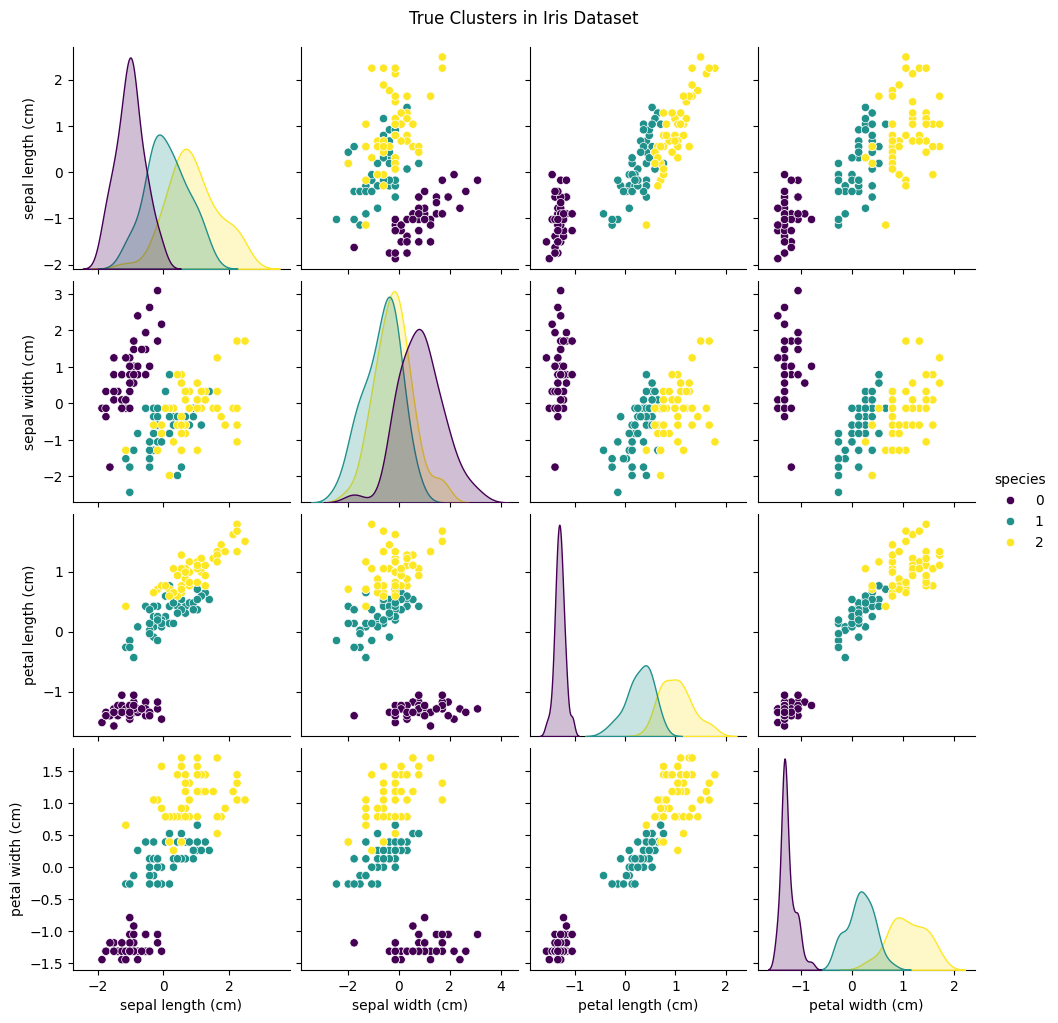

In [163]:
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle("True Clusters in Iris Dataset", y=1.02)
plt.show()

## **4. K-Means Clustering**

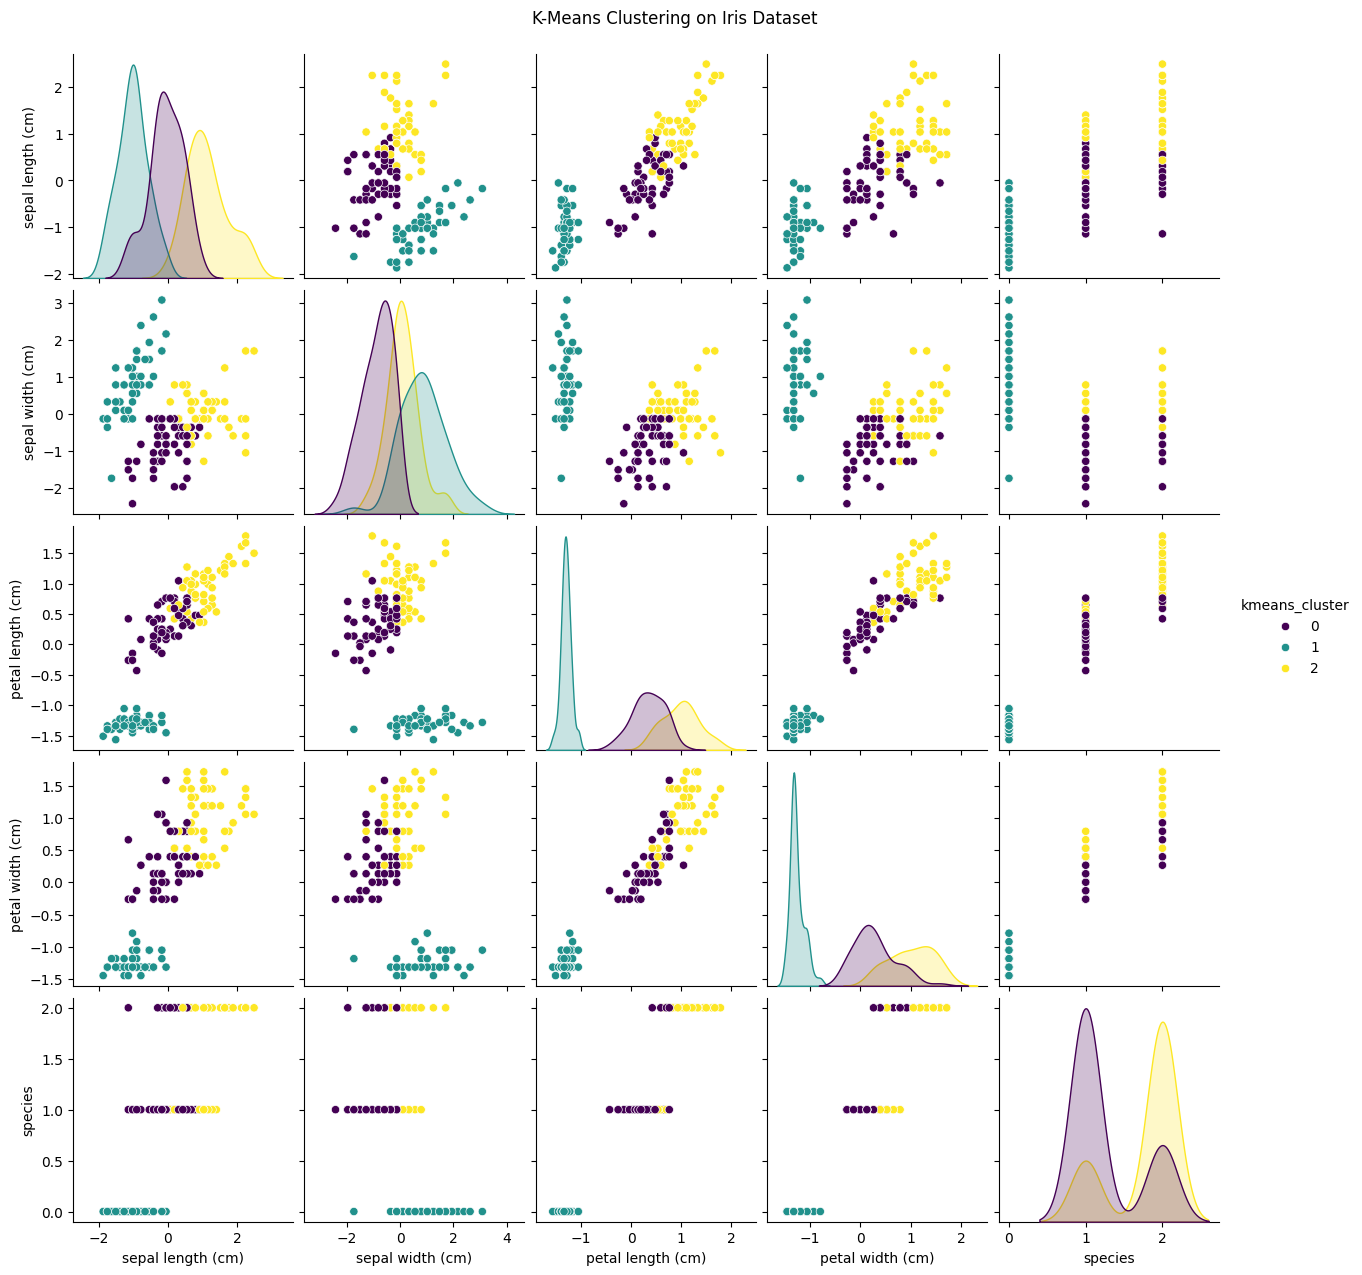

In [164]:
### apply K-Means with fixed n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

### add K-Means labels to DataFrame
iris_df['kmeans_cluster'] = kmeans_labels

### visualize K-Means clusters
sns.pairplot(iris_df, hue='kmeans_cluster', palette='viridis')
plt.suptitle("K-Means Clustering on Iris Dataset", y=1.02)
plt.show()

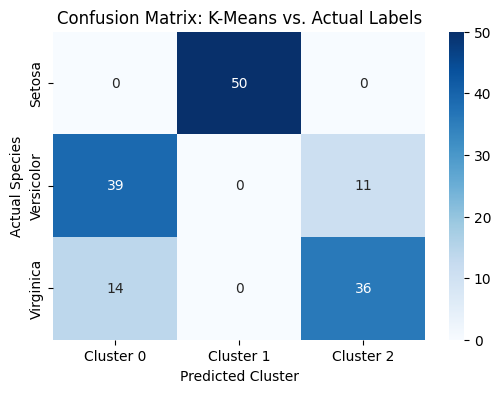

In [166]:
### compute confusion matrix
conf_matrix = confusion_matrix(y, kmeans_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Species")
plt.title("Confusion Matrix: K-Means vs. Actual Labels")
plt.show()

In [167]:
### create mapping table between actual species and K-Means clusters
cluster_mapping = pd.crosstab(index=y, columns=kmeans_labels, rownames=['Actual Species'], colnames=['K-Means Cluster'])
print(cluster_mapping)


K-Means Cluster   0   1   2
Actual Species             
0                 0  50   0
1                39   0  11
2                14   0  36


In [168]:
### evaluate K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"K-Means Adjusted Rand Index: {kmeans_ari:.2f}")


### Silhouette Score measures how well the clusters are separated and how compact they are.
### It ranges from -1 to 1:
## +1 → Well-separated clusters, very distinct.
## 0 → Overlapping clusters, poor separation.
## -1 → Wrong clustering (points assigned to wrong clusters).




### Adjusted Rand Index (ARI) measures how well clusters match true labels.
### It compares clustering with actual species labels (y).

### ARI Score Range:
### 1.0 → Perfect clustering (matches true labels exactly).
### 0.0 → Random clustering (clusters are meaningless).
### Negative → Worse than random.

K-Means Silhouette Score: 0.46
K-Means Adjusted Rand Index: 0.62


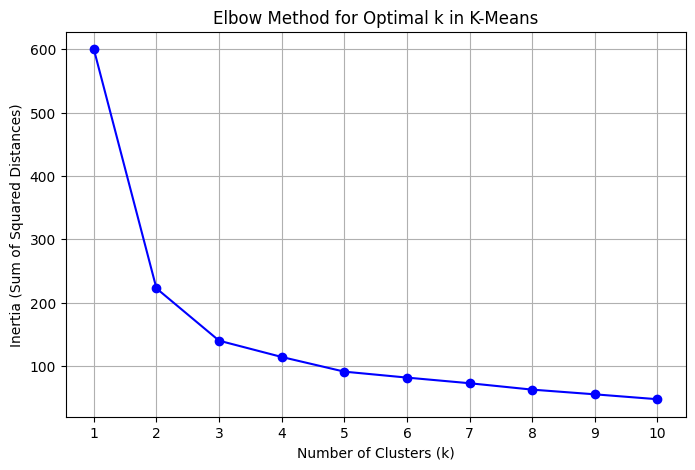

In [169]:
### elbow method
### range of cluster numbers to test
k_values = range(1, 11)
inertia_values = []

### compute K-Means for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)  ### store inertia (within-cluster sum of squares)

### plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k in K-Means")
plt.xticks(k_values)
plt.grid()
plt.show()

## **5. DBSCAN Clustering**

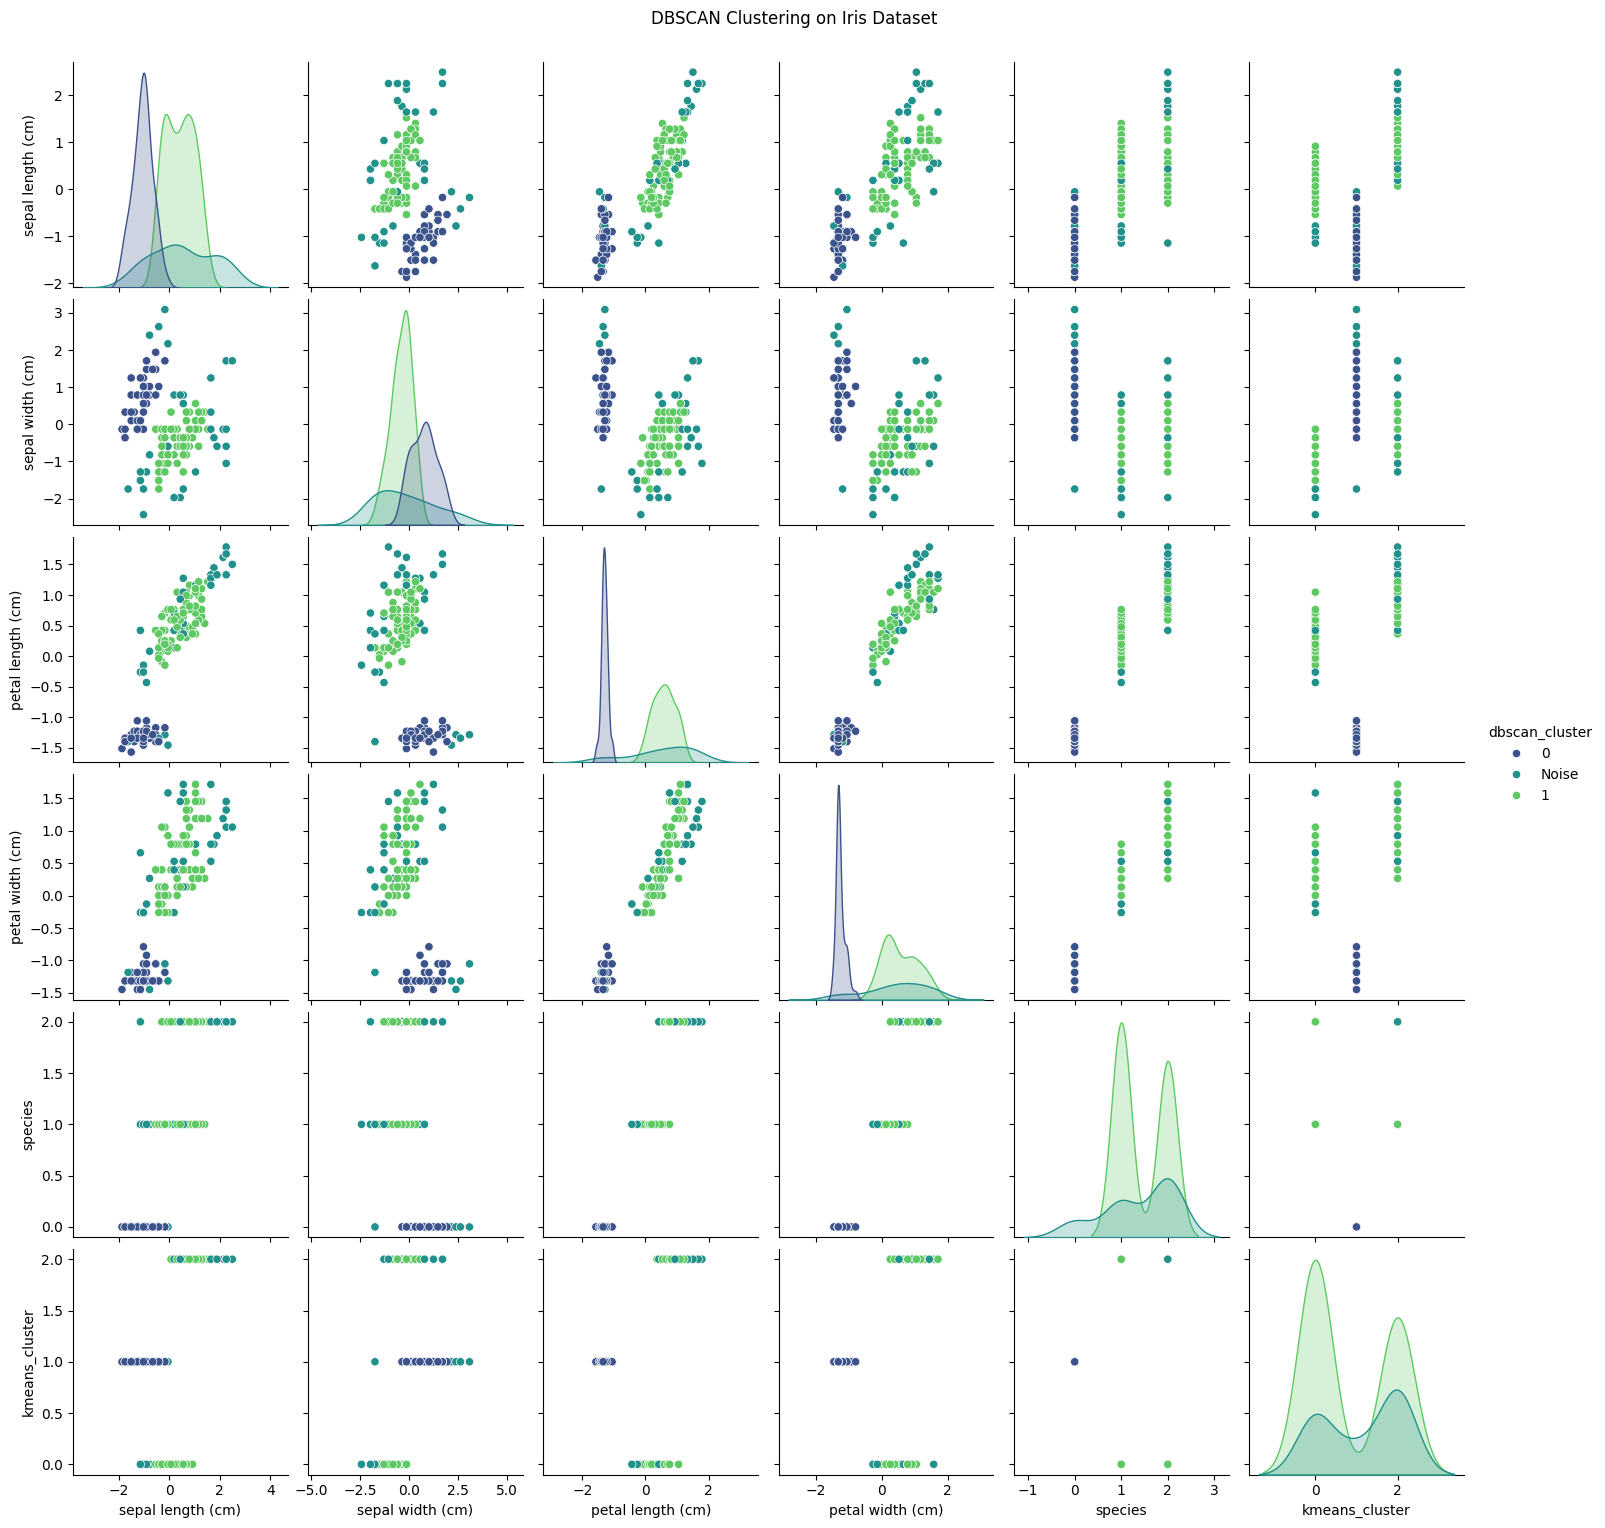

In [170]:
### apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

### handle noise points (-1)
iris_df['dbscan_cluster'] = dbscan_labels.astype(str)
iris_df['dbscan_cluster'] = iris_df['dbscan_cluster'].replace('-1', 'Noise')

### visualize DBSCAN clusters
sns.pairplot(iris_df, hue='dbscan_cluster', palette='viridis')
plt.suptitle("DBSCAN Clustering on Iris Dataset", y=1.02)
plt.show()



### epsilon (ε) radius, which defines aximum distance between two points to be considered neighbors.
### If two points are within this distance, they belong to same cluster.


### minimum number of points (including core point itself) required to form a dense region (a cluster).

In [171]:
### evaluate DBSCAN
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
dbscan_ari = adjusted_rand_score(y, dbscan_labels)


print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"DBSCAN Adjusted Rand Index: {dbscan_ari:.2f}")

DBSCAN Silhouette Score: 0.35651648142700726
DBSCAN Adjusted Rand Index: 0.44


## **6. Hierarchical Clustering & Dendrogram**

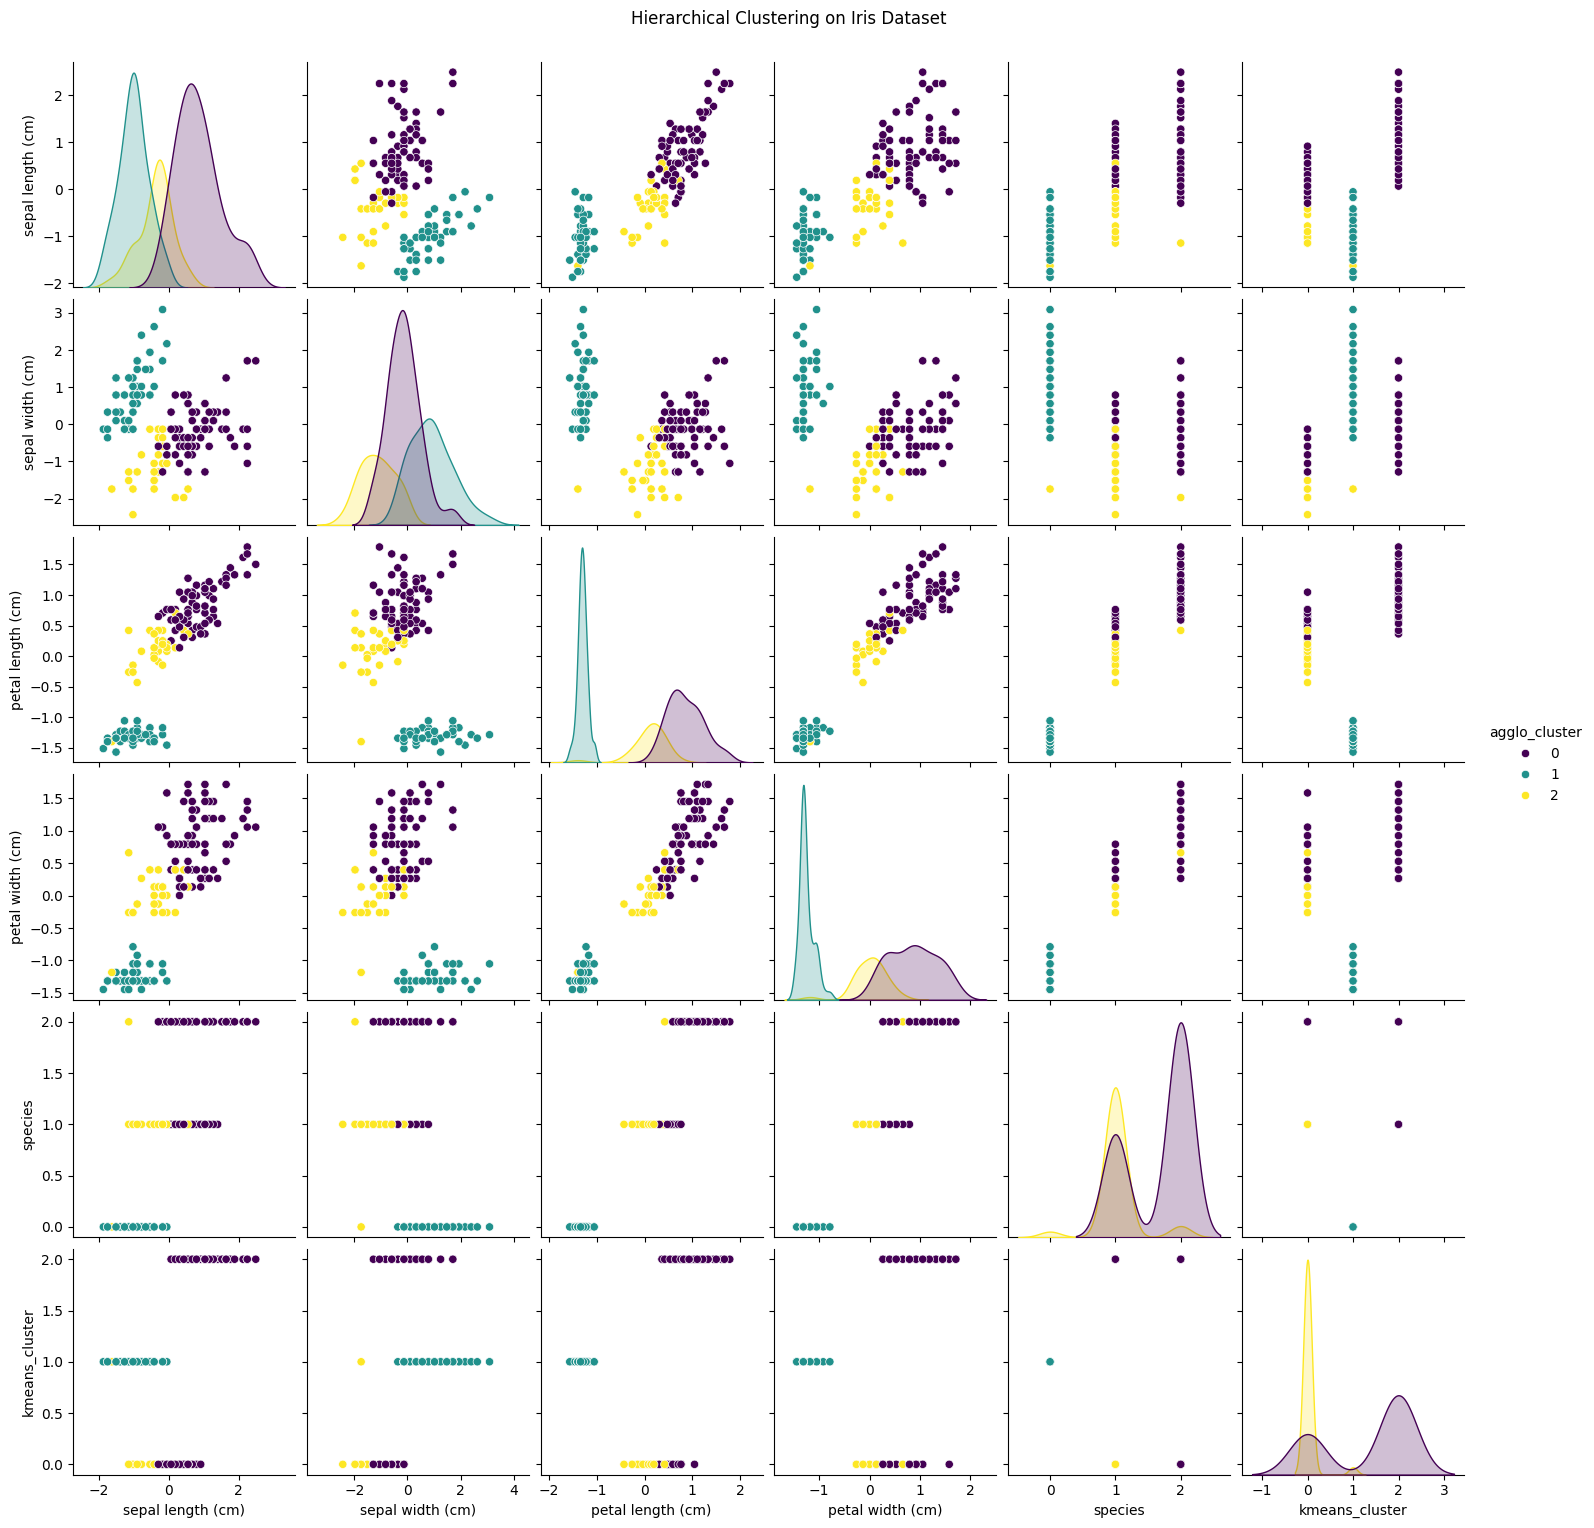

In [172]:
### Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

### add labels to DataFrame
iris_df['agglo_cluster'] = agglo_labels

### Visualize Hierarchical Clustering clusters
sns.pairplot(iris_df, hue='agglo_cluster', palette='viridis')
plt.suptitle("Hierarchical Clustering on Iris Dataset", y=1.02)
plt.show()

In [173]:
### Compute Silhouette Score (Only if more than 1 cluster)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)

### Compute Adjusted Rand Index (Comparison with True Labels)
agglo_ari = adjusted_rand_score(y, agglo_labels)

print(f"Hierarchical Clustering Silhouette Score: {agglo_silhouette}")
print(f"Hierarchical Clustering Adjusted Rand Index: {agglo_ari:.2f}")

Hierarchical Clustering Silhouette Score: 0.4466890410285909
Hierarchical Clustering Adjusted Rand Index: 0.62


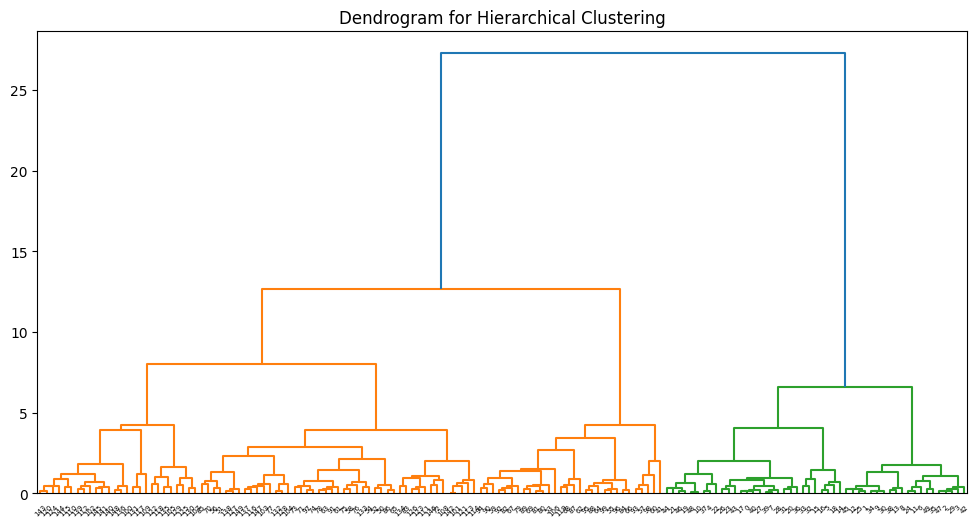

In [174]:
### dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xticks(rotation=45)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

## **7. Compare Clustering Algorithms**

,Algorithm,Silhouette Score,Adjusted Rand Index
0,K-Means,0.459948,0.620135
1,DBSCAN,0.356516,0.442099
2,Hierarchical Clustering,0.446689,0.615323


<Figure size 800x500 with 0 Axes>

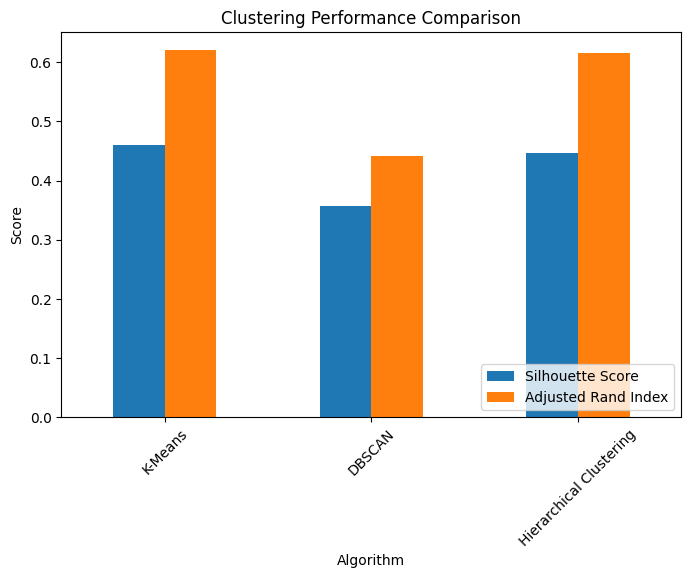

In [175]:
### create ummary table of clustering performance
results = {
    'Algorithm': ['K-Means', 'DBSCAN', 'Hierarchical Clustering'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, agglo_silhouette],
    'Adjusted Rand Index': [kmeans_ari, dbscan_ari, agglo_ari]
}

### convert to DataFrame
results_df = pd.DataFrame(results)



### display as table (useful in Jupyter or Colab)
import IPython.display as display
display.display(results_df)




### plot performance of clustering methods
plt.figure(figsize=(8, 5))
results_df.set_index('Algorithm').plot(kind='bar', figsize=(8, 5))
plt.title("Clustering Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()